In [1]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
len_min = 3

In [3]:
disease = 'autism'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-10-29-9-55-11' 

data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    sub_len = []
    for r in rd:
        sub_len.append(len(r[1::]))
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [4]:
print("The average number of tokens for each time slot of N days is {0:.2f}".format(np.mean(sub_len)))

The average number of tokens for each time slot of N days is 6.29


(array([2.72935e+05, 1.73830e+04, 5.30700e+03, 2.68800e+03, 1.33700e+03,
        6.02000e+02, 2.83000e+02, 1.01000e+02, 2.00000e+01, 1.40000e+01]),
 array([  1. ,  14.8,  28.6,  42.4,  56.2,  70. ,  83.8,  97.6, 111.4,
        125.2, 139. ]),
 <a list of 10 Patch objects>)

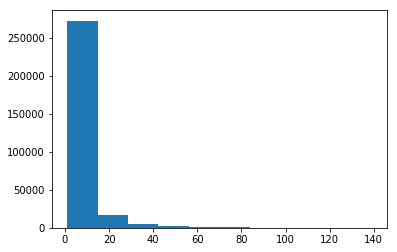

In [5]:
plt.hist(sub_len)

In [6]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
print("The average length of ehr sequences is: {0:.2f}".format(np.mean(l)))

The average length of ehr sequences is: 105.99


In [7]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

852 of 17850 patients have less than 3 records


In [8]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 3582


(array([7.20280112e-01, 1.30924370e-01, 6.21288515e-02, 3.15406162e-02,
        1.88235294e-02, 1.00840336e-02, 6.94677871e-03, 4.76190476e-03,
        3.36134454e-03, 2.35294118e-03, 2.18487395e-03, 1.12044818e-03,
        1.17647059e-03, 8.96358543e-04, 5.60224090e-04, 2.80112045e-04,
        6.16246499e-04, 2.80112045e-04, 5.60224090e-04, 1.12044818e-04,
        1.68067227e-04, 1.12044818e-04, 1.68067227e-04, 5.60224090e-05,
        5.60224090e-05, 0.00000000e+00, 5.60224090e-05, 5.60224090e-05,
        1.12044818e-04, 0.00000000e+00, 1.12044818e-04, 5.60224090e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.60224090e-05]),
 array([1.00000000e+00, 1.00472222e+02, 1.99944444e+02, 2.99416667e+02,
        3.98888889e+02, 4.98361111e+02, 5.97833333e+02, 6.97305556e+02,
        7.96777778e+02, 8.96250000e+02, 9.95722222e+02, 1.09519444e+03,
        1.19466667e+03, 1.29413889e+03, 1.39361111e+03, 1.49308333e+03,
        1.59255556e+03, 1.69202778e+03, 1.79150000e+03, 1.8909

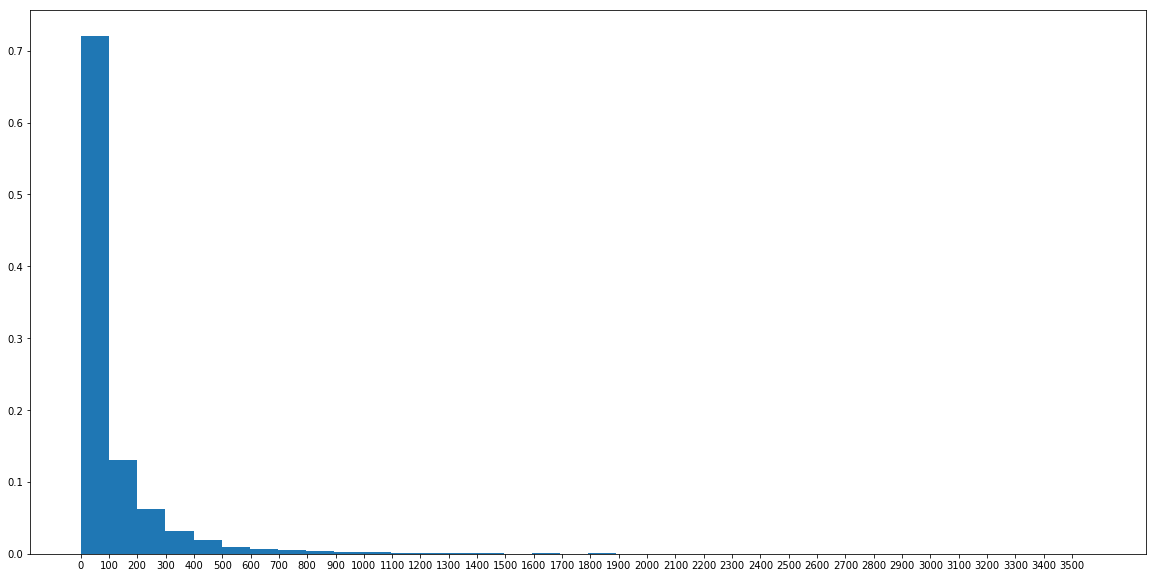

In [14]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36, weights=np.ones(len(l))/len(l))

In [15]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [16]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 852 out of 17850 patients
